# <center><font color="blue"><b>[DSiP] Diabetes Readmission Prediction</b></font></center>

In [44]:
# Step 1: Import Required Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(os.getcwd())
#os.chdir('C:/Users/amitniti/Downloads')  # Change to the directory where the ZIP file is

C:\


In [13]:
# Load the Dataset: We load the dataset and create an initial data DataFrame.
#csv_path = 'C:/Users/amitniti/OneDrive - Intel Corporation/Documents/AJ-Personal/(INTEL) IISc-MTech/2-Data Science in Practice/Project-1-DSiP-DiabetesReadmit/diabetic_data.csv'
csv_path = 'diabetic_data.csv'
df = pd.read_csv(csv_path)

In [18]:
# Displaying the first few rows gives a sense of the data
print("\nFirst 5 Rows of the Dataset:")
df.head(5)


First 5 Rows of the Dataset:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [16]:
print("Shape of the Dataset:", df.shape)  # (Rows, Columns)
print("\nColumns in the Dataset:\n", df.columns)
print("\nData Types:\n", df.dtypes)

# Overview of the dataset structure
print("Data Structure Overview:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

# Check the number of unique values in each column to identify categorical features
print("\nUnique Value Counts for Each Column:")
print(df.nunique())

Shape of the Dataset: (101766, 50)

Columns in the Dataset:
 Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Data Ty

### <center><font color="green"><i>Learn and Understand the Dataset</u></i></font></center>

<div style="color: blue;">
  <p>The dataset contains information on diabetic patient encounters, with each record representing an inpatient admission. Key fields include:</p>
  <ul>
    <li><strong>Demographics</strong> (race, gender, age)</li>
    <li><strong>Hospital Information</strong> (admission type, discharge disposition)</li>
    <li><strong>Encounter Details</strong> (time in hospital, number of lab tests, number of medications)</li>
    <li><strong>Medical History</strong> (primary, secondary, tertiary diagnoses)</li>
    <li><strong>Readmission Status</strong> (indicating if a patient was readmitted within 30 days)</li>
    <li><strong>Diabetes-related Measures</strong> (such as A1c test results and glucose serum test results)</li>
  </ul>
  <p>The target variable for prediction is the <strong>readmission status</strong>, which is either <strong>&lt;30</strong>, <strong>&gt;30</strong>, or <strong>No</strong>.</p>
</div>

### <center><font color="green"><i>Analyze the Dataset on the "Readmission Process/Frequency"</u></i></font></center>

<div style="color: blue;">
  <h3>Impact of Attributes on Readmission Occurrences</h2>
  
  <h4>1. Readmission Distribution</h3>
  <p>Patients are classified as either not readmitted (<span style="background-color: yellow;"><strong>NO</strong></span>), readmitted within 30 days (<span style="background-color: yellow;"><strong>&lt;30</strong></span>), or readmitted after 30 days (<span style="background-color: yellow;"><strong>&gt;30</strong></span>).</p>
  <ul>
    <li>The counts are:
      <ul>
        <li><span style="background-color: yellow;"><strong>NO</strong></span>: 54,864 patients</li>
        <li><span style="background-color: yellow;"><strong>&gt;30</strong></span> (readmitted after 30 days): 35,545 patients</li>
        <li><span style="background-color: yellow;"><strong>&lt;30</strong></span> (readmitted within 30 days): 11,357 patients</li>
      </ul>
    </li>
  </ul>
  
  <h4>2. Patients with Multiple Admissions</h3>
  <p>There are <span style="background-color: yellow;"><strong>16,773 unique patients</strong></span> with multiple admissions, indicating potential readmissions.</p>
  
  <h4>3. Attribute Comparison (Multiple vs. Single Admission)</h3>
  <p>Patients with multiple admissions tend to have slightly higher averages in several key attributes compared to those with a single admission:</p>
  <ul>
    <li><strong>Time in Hospital</strong>: <span style="background-color: yellow;">4.60 days</span> (multiple admissions) vs. <span style="background-color: yellow;">4.22 days</span> (single admission)</li>
    <li><strong>Number of Medications</strong>: <span style="background-color: yellow;">16.48</span> (multiple) vs. <span style="background-color: yellow;">15.63</span> (single)</li>
    <li><strong>Number of Diagnoses</strong>: <span style="background-color: yellow;">7.70</span> (multiple) vs. <span style="background-color: yellow;">7.18</span> (single)</li>
    <li>Interestingly, <strong>number of procedures</strong> is slightly lower for patients with multiple admissions (<span style="background-color: yellow;">1.19</span> vs. <span style="background-color: yellow;">1.47</span>), possibly indicating a different treatment plan.</li>
  </ul>
</div>

In [37]:
# Step 1: Create a new DataFrame with relevant columns impacting readmission, including A1Cresult and max_glu_serum
# Adding the mapped columns 'max_glu_serum_map' and 'a1cresult_map' in the list
impacting_attributes = [
    'patient_nbr', 'readmitted', 'time_in_hospital', 'num_medications',
    'num_lab_procedures', 'num_procedures', 'number_diagnoses', 'admission_type_id',
    'discharge_disposition_id', 'admission_source_id', 'medical_specialty', 'A1Cresult', 
    'max_glu_serum', 'max_glu_serum_map', 'a1cresult_map'
]

# Ordinal encoding mappings based on the provided mappings
glu_mapping = {'NaN': 0, 'Norm': 1, '>200': 2, '>300': 3}
a1c_mapping = {'NaN': 0, 'Norm': 1, '>7': 2, '>8': 3}

# Step 2: Encode 'max_glu_serum' and 'A1Cresult' columns in the original DataFrame
df['max_glu_serum_map'] = df['max_glu_serum'].map(glu_mapping)
df['a1cresult_map'] = df['A1Cresult'].map(a1c_mapping)

# Step 3: Filter patients with more than one admission
multiple_admissions_df = df.groupby('patient_nbr').filter(lambda x: len(x) > 1)

# Step 4: Group by 'patient_nbr' and calculate counts for each attribute, sorted by readmission count in descending order
# Include the newly encoded columns in the grouped summary
grouped_counts = (
    multiple_admissions_df
    .groupby('patient_nbr')
    .agg({
        'readmitted': 'count',
        'time_in_hospital': 'mean',
        'num_medications': 'mean',
        'num_lab_procedures': 'mean',
        'num_procedures': 'mean',
        'number_diagnoses': 'mean',
        'admission_type_id': 'mean',
        'discharge_disposition_id': 'mean',
        'admission_source_id': 'mean',
        'medical_specialty': 'count',  # Count for categorical data
        'max_glu_serum_map': 'mean',
        'a1cresult_map': 'mean'
    })
    .sort_values(by='readmitted', ascending=False)
)

# Display the updated grouped_counts DataFrame with the encoded columns
print("Updated grouped_counts DataFrame with encoded columns:")

Updated grouped_counts DataFrame with encoded columns:


In [38]:
grouped_counts.head(50)

,readmitted,time_in_hospital,num_medications,num_lab_procedures,num_procedures,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,medical_specialty,max_glu_serum_map,a1cresult_map
patient_nbr,,,,,,,,,,,,
88785891,40,3.175000,13.975000,39.825000,0.200000,6.800000,1.650000,1.700000,6.925000,40,NaN,3.000000
43140906,28,3.035714,8.535714,41.178571,0.142857,2.571429,1.142857,1.714286,6.571429,28,NaN,3.000000
88227540,23,6.304348,13.434783,46.652174,1.130435,8.695652,1.000000,2.521739,7.000000,23,NaN,1.000000
1660293,23,6.260870,19.347826,56.869565,0.913043,8.608696,1.956522,3.869565,4.391304,23,NaN,3.000000
23199021,23,2.608696,13.695652,38.652174,0.652174,7.652174,1.521739,1.000000,5.434783,23,NaN,NaN
23643405,22,5.136364,15.363636,21.636364,1.136364,8.000000,5.227273,6.727273,17.000000,22,2.636364,NaN
84428613,22,8.181818,22.181818,58.136364,1.045455,8.181818,1.090909,2.818182,6.181818,22,2.800000,3.000000
92709351,21,4.666667,21.523810,27.904762,2.428571,8.761905,2.095238,1.000000,7.000000,21,NaN,2.600000
89472402,20,4.350000,12.700000,22.900000,1.300000,6.850000,2.500000,1.350000,4.600000,20,NaN,2.500000


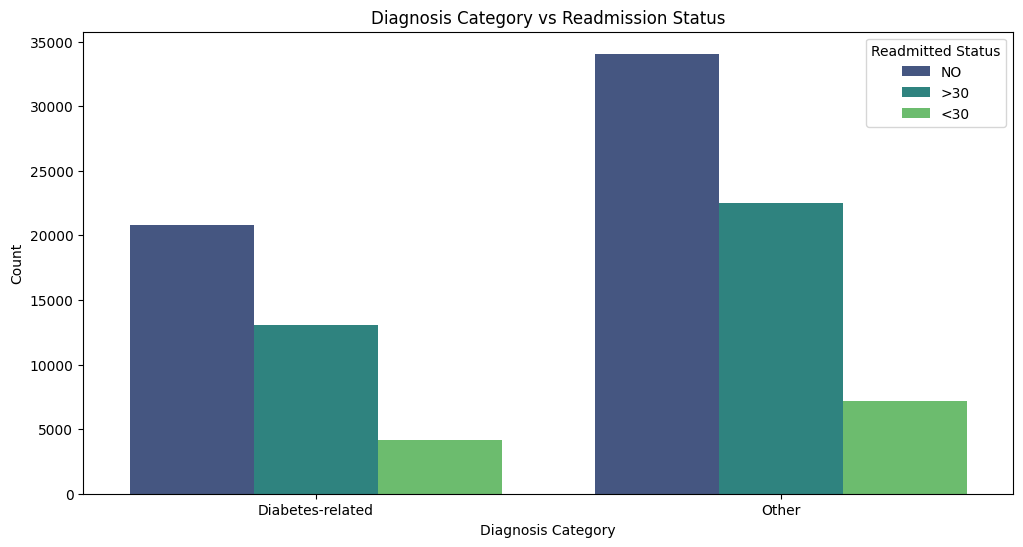

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'diabetic_data.csv'
data = pd.read_csv(file_path)

# Step 1: Define a function to classify diagnoses related to diabetes
def classify_diagnosis(diag1, diag2, diag3):
    if str(diag1).startswith('250') or str(diag2).startswith('250') or str(diag3).startswith('250'):
        return 'Diabetes-related'
    else:
        return 'Other'

# Step 2: Create 'diagnosis_map' column based on diabetes-related classification
data['diagnosis_map'] = data.apply(lambda row: classify_diagnosis(row['diag_1'], row['diag_2'], row['diag_3']), axis=1)

# Step 3: Visualize the data pattern between 'diagnosis_map' and 'readmitted'
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='diagnosis_map', hue='readmitted', palette='viridis')
plt.title('Diagnosis Category vs Readmission Status')
plt.xlabel('Diagnosis Category')
plt.ylabel('Count')
plt.legend(title='Readmitted Status')
plt.show()

Readmission rates for each insulin category (mapped):
insulin_map
-1    0.527910
 0    0.436971
 1    0.451068
 2    0.515376
Name: readmitted_numeric, dtype: float64


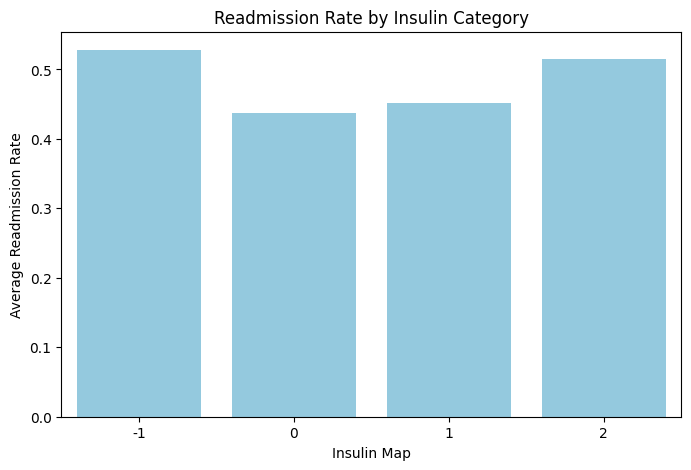

In [43]:
# Load the dataset
file_path = 'diabetic_data.csv'
data = pd.read_csv(file_path)

# Step 1: Generate a new column "insulin_map" based on decoding values in "insulin"
# Mapping: 'No' -> 0, 'Steady' -> 1, 'Up' -> 2, 'Down' -> -1
insulin_mapping = {'No': 0, 'Steady': 1, 'Up': 2, 'Down': -1}
data['insulin_map'] = data['insulin'].map(insulin_mapping)

# Step 2: Analyze the pattern between "insulin_map" and "readmitted"
# Convert 'readmitted' to numerical values for analysis
readmitted_mapping = {'<30': 1, '>30': 1, 'NO': 0}
data['readmitted_numeric'] = data['readmitted'].map(readmitted_mapping)

# Calculate the mean readmission rate for each insulin_map category
insulin_readmission_pattern = data.groupby('insulin_map')['readmitted_numeric'].mean()

# Display the readmission rates by insulin category
print("Readmission rates for each insulin category (mapped):")
print(insulin_readmission_pattern)

# Step 3: Visualize the pattern between "insulin_map" and "readmitted"
plt.figure(figsize=(8, 5))
sns.barplot(x=insulin_readmission_pattern.index, y=insulin_readmission_pattern.values, color='skyblue')
plt.title('Readmission Rate by Insulin Category')
plt.xlabel('Insulin Map')
plt.ylabel('Average Readmission Rate')
plt.xticks(rotation=0)
plt.show()

In [50]:
# Load the dataset
file_path = 'diabetic_data.csv'
df = pd.read_csv(file_path)

# Step 1: Define the list of columns impacting readmission, including the mapped columns
impacting_attributes = [
    'patient_nbr', 'readmitted', 'time_in_hospital', 'num_medications',
    'num_lab_procedures', 'num_procedures', 'number_diagnoses', 'admission_type_id',
    'discharge_disposition_id', 'admission_source_id', 'medical_specialty', 
    'A1Cresult', 'max_glu_serum', 'max_glu_serum_map', 'a1cresult_map', 'insulin_map'
]

# Define the ordinal encoding mappings
glu_mapping = {'NaN': 0, 'Norm': 1, '>200': 2, '>300': 3}
a1c_mapping = {'NaN': 0, 'Norm': 1, '>7': 2, '>8': 3}
insulin_mapping = {'No': 0, 'Steady': 1, 'Up': 2, 'Down': -1}

# Step 2: Encode 'max_glu_serum', 'A1Cresult', and 'insulin' columns in the DataFrame
df['max_glu_serum_map'] = df['max_glu_serum'].map(glu_mapping)
df['a1cresult_map'] = df['A1Cresult'].map(a1c_mapping)
df['insulin_map'] = df['insulin'].map(insulin_mapping)

# Step 3: Filter patients with more than one admission
multiple_admissions_df = df.groupby('patient_nbr').filter(lambda x: len(x) > 1)

# Step 4: Group by 'patient_nbr' and calculate counts/averages for each attribute
grouped_counts = (
    multiple_admissions_df
    .groupby('patient_nbr')
    .agg({
        'readmitted': 'count',
        'time_in_hospital': 'mean',
        'num_medications': 'mean',
        'num_lab_procedures': 'mean',
        'num_procedures': 'mean',
        'number_diagnoses': 'mean',
        'admission_type_id': 'mean',
        'discharge_disposition_id': 'mean',
        'admission_source_id': 'mean',
        'medical_specialty': 'count',  # Count for categorical data
        'max_glu_serum_map': 'mean',
        'a1cresult_map': 'mean',
        'insulin_map': 'mean'  # Include insulin_map in the grouped summary
    })
    .sort_values(by='readmitted', ascending=False)
)

# Display the updated grouped_counts DataFrame with the encoded columns
print("Updated grouped_counts DataFrame with encoded columns:")

Updated grouped_counts DataFrame with encoded columns:


In [53]:
print(grouped_counts.shape)
grouped_counts.head(50)

(16773, 13)


,readmitted,time_in_hospital,num_medications,num_lab_procedures,num_procedures,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,medical_specialty,max_glu_serum_map,a1cresult_map,insulin_map
patient_nbr,,,,,,,,,,,,,
88785891,40,3.175000,13.975000,39.825000,0.200000,6.800000,1.650000,1.700000,6.925000,40,NaN,3.000000,0.975000
43140906,28,3.035714,8.535714,41.178571,0.142857,2.571429,1.142857,1.714286,6.571429,28,NaN,3.000000,0.250000
88227540,23,6.304348,13.434783,46.652174,1.130435,8.695652,1.000000,2.521739,7.000000,23,NaN,1.000000,0.391304
1660293,23,6.260870,19.347826,56.869565,0.913043,8.608696,1.956522,3.869565,4.391304,23,NaN,3.000000,0.956522
23199021,23,2.608696,13.695652,38.652174,0.652174,7.652174,1.521739,1.000000,5.434783,23,NaN,NaN,0.260870
23643405,22,5.136364,15.363636,21.636364,1.136364,8.000000,5.227273,6.727273,17.000000,22,2.636364,NaN,0.500000
84428613,22,8.181818,22.181818,58.136364,1.045455,8.181818,1.090909,2.818182,6.181818,22,2.800000,3.000000,0.045455
92709351,21,4.666667,21.523810,27.904762,2.428571,8.761905,2.095238,1.000000,7.000000,21,NaN,2.600000,0.952381
89472402,20,4.350000,12.700000,22.900000,1.300000,6.850000,2.500000,1.350000,4.600000,20,NaN,2.500000,0.500000


Correlation matrix with 'readmitted_binary':
medical_specialty     1.000000
readmitted_binary     1.000000
readmitted            1.000000
max_glu_serum_map     0.194602
number_diagnoses      0.067392
a1cresult_map         0.058487
num_medications       0.052563
time_in_hospital      0.020750
insulin_map           0.010113
num_lab_procedures    0.006809
num_procedures       -0.062488
Name: readmitted_binary, dtype: float64


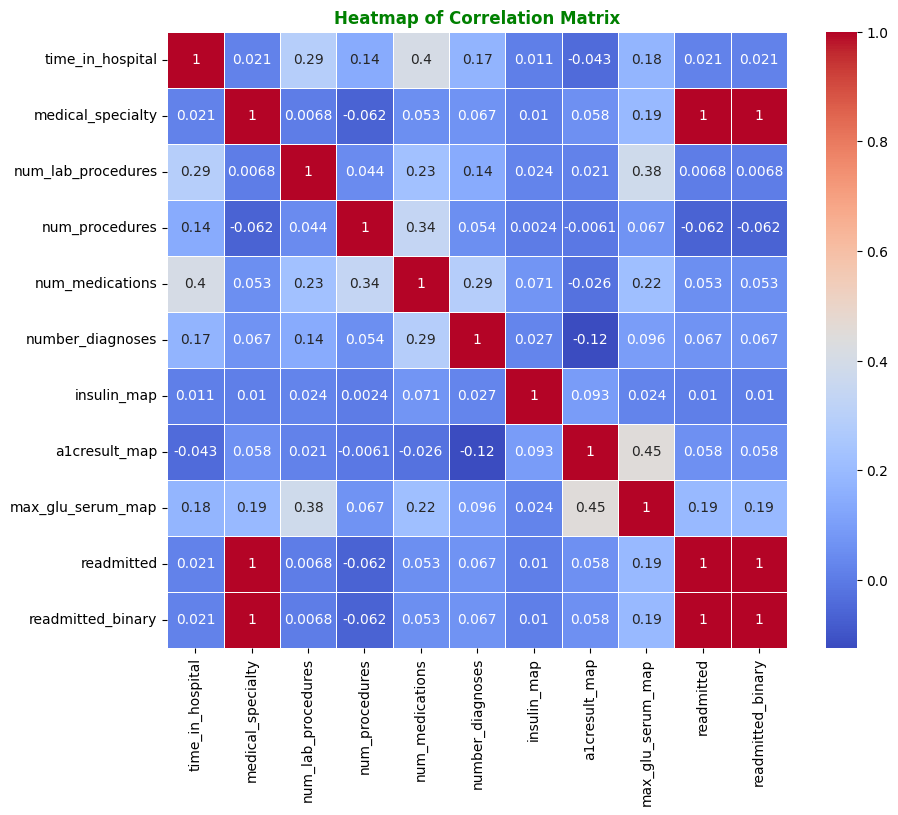

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define the columns for correlation and heatmap analysis
columns_for_analysis = [
    'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
    'num_procedures', 'num_medications', 'number_diagnoses', 
    'insulin_map', 'a1cresult_map', 'max_glu_serum_map', 'readmitted'
]

# Step 2: Filter the existing 'grouped_counts' DataFrame to include only the selected columns
analysis_df = grouped_counts[columns_for_analysis].copy()

# Step 3: Ensure 'readmitted' is in a numeric binary format (1 for readmitted, 0 for not readmitted) if necessary
if analysis_df['readmitted'].dtype == 'object':
    analysis_df['readmitted_binary'] = analysis_df['readmitted'].apply(lambda x: 1 if x in ['<30', '>30'] else 0)
else:
    analysis_df['readmitted_binary'] = analysis_df['readmitted']

# Step 4: Calculate the correlation matrix on numerical columns only
correlation_matrix = analysis_df.corr()

# Step 5: Display the correlation matrix with 'readmitted_binary'
print("Correlation matrix with 'readmitted_binary':")
print(correlation_matrix['readmitted_binary'].sort_values(ascending=False))

# Step 6: Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Correlation Matrix", fontdict={'color': 'green', 'weight': 'bold'})
plt.show()

<div style="color: #4a4a4a; font-family: Arial, sans-serif;">
  <p>The heatmap in the attached image shows the correlation matrix for selected numerical columns in the <strong style="background-color: #ffd700; padding: 2px;">"grouped_counts" DataFrame</strong> generated from patient data, including attributes related to diabetes and hospital encounters. Here’s a summary of the insights:</p>

  <h3 style="color: #4682b4;">1. Correlation Scale</h3>
  <ul>
    <li>The heatmap uses a color scale where <strong style="background-color: #ff6347; color: white; padding: 2px;">dark red</strong> indicates a high positive correlation (close to 1), <strong style="background-color: #4169e1; color: white; padding: 2px;">dark blue</strong> indicates a high negative correlation (close to -1), and lighter shades indicate weaker correlations (closer to 0).</li>
    <li>Cells with values close to <strong>1</strong> or <strong>-1</strong> show strong relationships, while values near <strong>0</strong> show little or no correlation.</li>
  </ul>

  <h3 style="color: #4682b4;">2. Key Observations</h3>
  <ul>
    <li><strong style="background-color: #ffd700; padding: 2px;">time_in_hospital and num_medications</strong>: This correlation is approximately 0.4, suggesting that longer hospital stays are associated with a higher number of medications administered.</li>
    <li><strong style="background-color: #ffd700; padding: 2px;">num_lab_procedures and max_glu_serum_map</strong>: There is a moderate positive correlation (~0.38), indicating that patients undergoing more lab procedures often have elevated glucose serum levels.</li>
    <li><strong style="background-color: #ffd700; padding: 2px;">time_in_hospital and num_lab_procedures</strong>: With a correlation of around 0.29, this suggests that longer stays may involve more lab tests.</li>
    <li><strong style="background-color: #ffd700; padding: 2px;">time_in_hospital and a1cresult_map</strong>: Shows a small positive correlation (~0.18), hinting at a weak relationship between A1C test results and length of hospital stay.</li>
  </ul>

  <h3 style="color: #4682b4;">3. Low Correlation with Readmission</h3>
  <ul>
    <li>Most features have low correlations with <strong style="background-color: #ffd700; padding: 2px;">readmitted</strong> or <strong style="background-color: #ffd700; padding: 2px;">readmitted_binary</strong>. The highest correlation is with <strong style="background-color: #ffd700; padding: 2px;">num_medications</strong> (0.053), indicating a minimal direct relationship between any single feature and readmission likelihood.</li>
  </ul>

  <h3 style="color: #4682b4;">4. Potential Predictive Features</h3>
  <ul>
    <li>Features such as <strong style="background-color: #ffd700; padding: 2px;">time_in_hospital</strong>, <strong style="background-color: #ffd700; padding: 2px;">num_medications</strong>, and <strong style="background-color: #ffd700; padding: 2px;">num_lab_procedures</strong> show slightly higher correlations with other factors, suggesting they might contribute to understanding patient profiles and predicting health outcomes.</li>
    <li>Weakly correlated features, like <strong style="background-color: #ffd700; padding: 2px;">insulin_map</strong> and <strong style="background-color: #ffd700; padding: 2px;">medical_specialty</strong>, show limited predictive power individually but may still add value when combined with other factors in models.</li>
  </ul>

  <p>This analysis provides a foundational understanding of feature relationships in patient data, helping to identify variables that may contribute to further modeling efforts, particularly in predicting patient outcomes like readmission.</p>
</div>

Top features correlated with readmission for diabetes patients:
readmitted_binary        1.000000
number_diagnoses         0.157651
time_in_hospital         0.096414
max_glu_serum_encoded    0.092256
num_medications          0.078944
num_lab_procedures       0.065165
a1cresult_encoded        0.003499
insulin_encoded         -0.002702
num_procedures          -0.034942
Name: readmitted_binary, dtype: float64


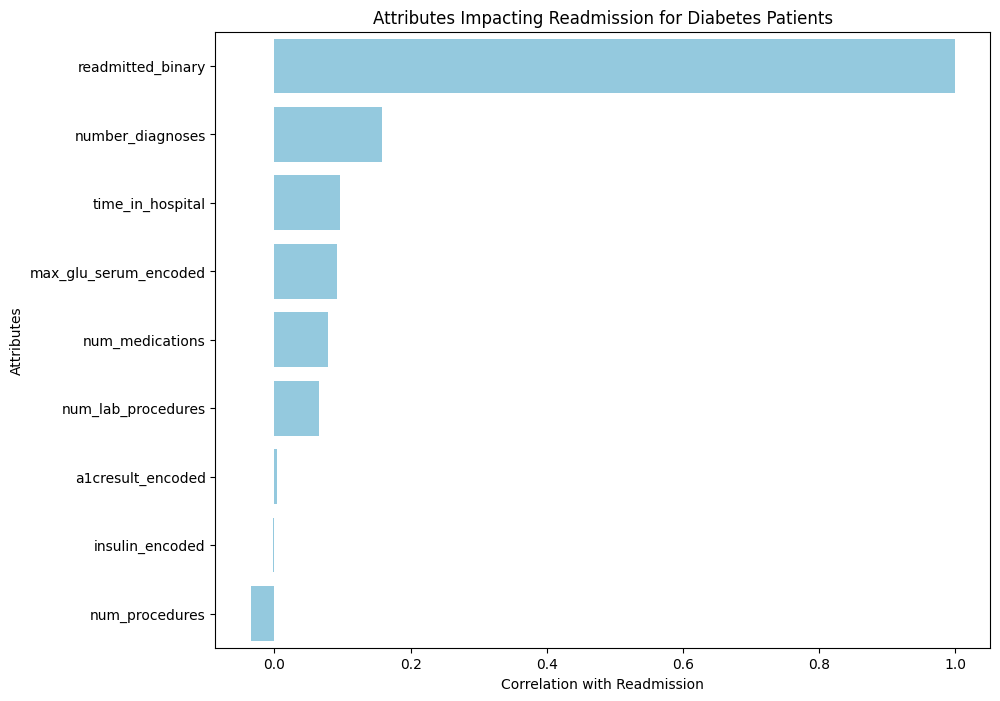

In [62]:
# Load the dataset
file_path = 'diabetic_data.csv'
df = pd.read_csv(file_path)

# Step 1: Filter for diabetes patients based on ICD-9 diagnosis codes
# Diabetes-related ICD-9 codes start with '250'
def is_diabetes_patient(row):
    return any(str(code).startswith('250') for code in [row['diag_1'], row['diag_2'], row['diag_3']])

df['is_diabetes'] = df.apply(is_diabetes_patient, axis=1)
diabetes_df = df[df['is_diabetes'] == True]

# Step 2: Convert 'readmitted' to binary for analysis (1 for '<30' or '>30', 0 for 'NO')
diabetes_df = diabetes_df.copy()  # To avoid SettingWithCopyWarning
diabetes_df['readmitted_binary'] = diabetes_df['readmitted'].apply(lambda x: 1 if x in ['<30', '>30'] else 0)

# Step 3: Encode categorical columns
insulin_mapping = {'No': 0, 'Steady': 1, 'Up': 2, 'Down': -1}
a1cresult_mapping = {'None': 0, 'Norm': 1, '>7': 2, '>8': 3}
glu_serum_mapping = {'None': 0, 'Norm': 1, '>200': 2, '>300': 3}

diabetes_df['insulin_encoded'] = diabetes_df['insulin'].map(insulin_mapping)
diabetes_df['a1cresult_encoded'] = diabetes_df['A1Cresult'].map(a1cresult_mapping)
diabetes_df['max_glu_serum_encoded'] = diabetes_df['max_glu_serum'].map(glu_serum_mapping)

# Step 4: Calculate correlations between attributes and readmission
numeric_attributes = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_diagnoses', 'insulin_encoded', 
    'a1cresult_encoded', 'max_glu_serum_encoded', 'readmitted_binary'
]

# Calculate the correlation matrix with the readmitted_binary variable
correlation_matrix = diabetes_df[numeric_attributes].corr()
readmission_corr = correlation_matrix['readmitted_binary'].sort_values(ascending=False)

# Display top features most correlated with readmission
print("Top features correlated with readmission for diabetes patients:")
print(readmission_corr.head(10))

# Step 5: Visualize the top correlated attributes with readmission
plt.figure(figsize=(10, 8))
sns.barplot(y=readmission_corr.index, x=readmission_corr.values, color='skyblue')
plt.title("Attributes Impacting Readmission for Diabetes Patients")
plt.xlabel("Correlation with Readmission")
plt.ylabel("Attributes")
plt.show()